In [1]:
## This notebook is used to create a time series of sea-ice extent/area/concentration

In [2]:

import csv
import pandas as pd
import matplotlib as plt
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
import numpy as np

import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
import scipy.interpolate
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

In [5]:
#file = pd.read_csv('Data/Sea-Ice-Extent/N_09_extent_v3.0.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#series = pd.read_csv('Data/WinterMeanTemp1987-2019', header=0, index_col=0, parse_dates=True, squeeze=True)
#print(file)
tab = Table.read('Data/Sea-Ice-Extent/N_09_extent_v3.0.csv',format='ascii')
#print(tab)

In [6]:
tab = Table.read('Data/Sea-Ice-Extent/N_09_extent_v3.0.csv',format='ascii')
yrlist=[]
extentlist=[]
arealist=[]
#print(tab)
for i in range(0,42):
    if tab['year'][i]<=1979:
        continue
    else:
        yrlist.append(tab['year'][i])
        extentlist.append(tab['extent'][i])
        arealist.append(tab['area'][i])
#print(yrlist)
#print(extentlist)
t=Table()
t['Year'] = yrlist
t['Extent'] = extentlist
t['Area'] = arealist
print(t)
ascii.write(t, 'sea-ice-extent_1980-2020', names=['Year', 'Extent','Area'], overwrite=True)

Year Extent Area
---- ------ ----
1980   7.67 4.87
1981   7.14 4.44
1982    7.3 4.43
1983   7.39  4.7
1984   6.81 4.11
1985    6.7 4.23
1986   7.41 4.72
1987   7.28 5.64
1988   7.37 5.36
1989   7.01 4.86
 ...    ...  ...
2010   4.87 3.34
2011   4.56 3.21
2012   3.57 2.41
2013   5.21 3.78
2014   5.22 3.74
2015   4.62 3.42
2016   4.53 2.91
2017   4.82 3.35
2018   4.79 3.35
2019   4.36 3.17
2020   3.92 2.78
Length = 41 rows


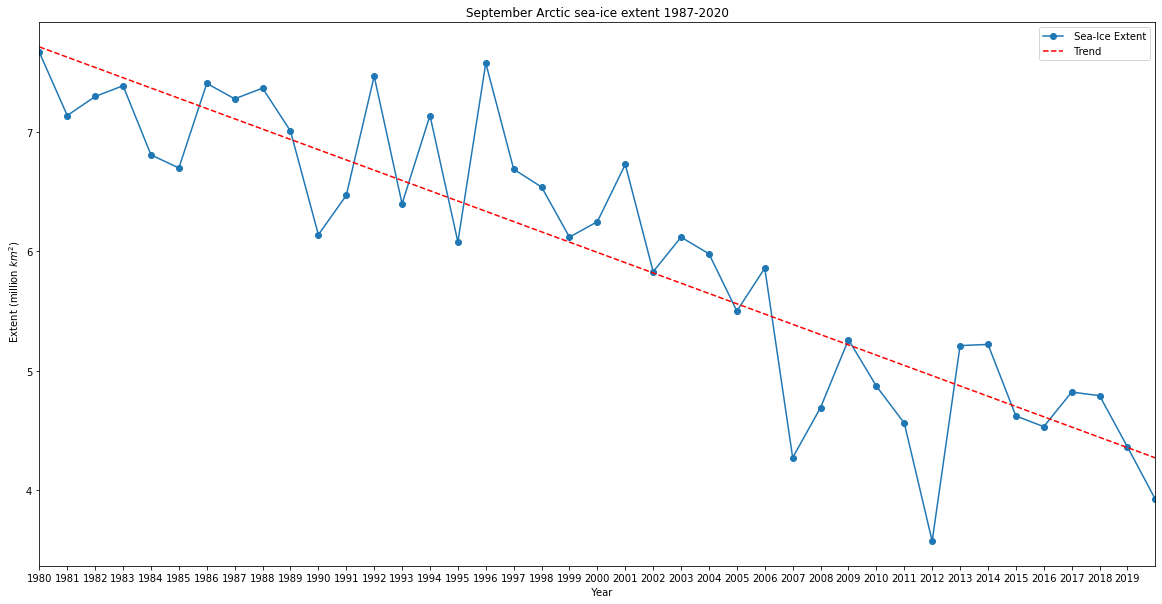

In [3]:
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year']
yaxis=tab['Extent']
ax.set_ylabel('  Extent (million $km^2$)')
ax.set_title('September Arctic sea-ice extent 1987-2020')
ax.set_xlabel('   Year')
ax.set_xlim(1980,2020)
ax.set_xticks(np.arange(1980, 2020, step=1))
plt.plot(xaxis,yaxis,'o-')
z = np.polyfit(xaxis,yaxis, 1) 
p = np.poly1d(z)
ax.plot(xaxis,p(xaxis),"r--")
#plt.plot(x,y)
plt.legend([" Sea-Ice Extent", " Trend"])
fig.savefig('Sept_SeaIceExtent_1980-2020.png')
plt.show()

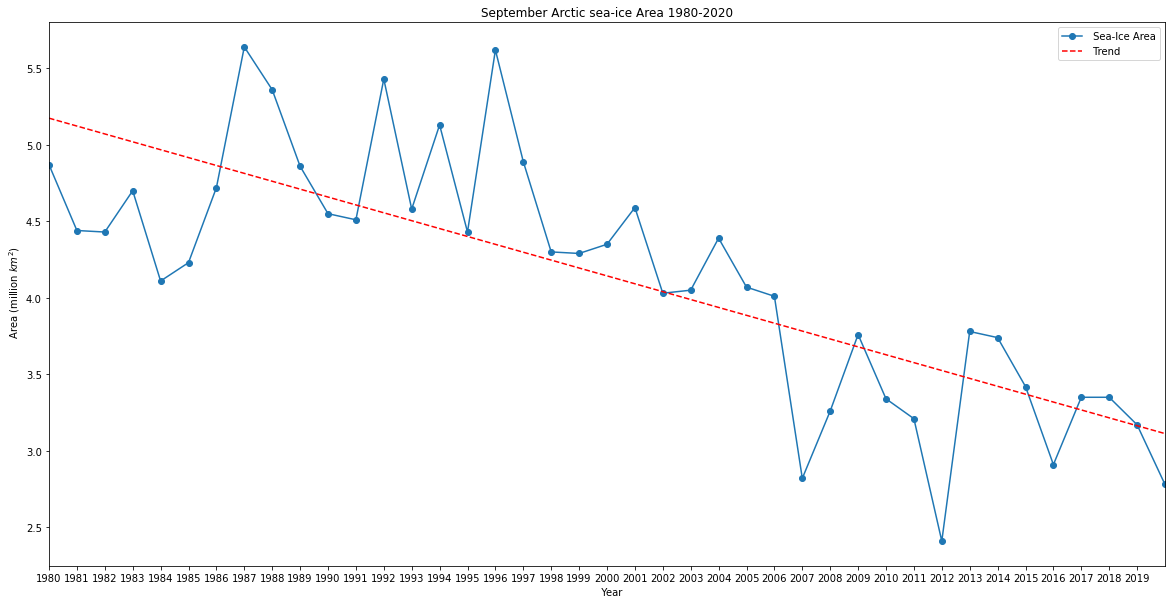

In [10]:
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year']
yaxis=tab['Area']
ax.set_ylabel('  Area (million $km^2$)')
ax.set_title('September Arctic sea-ice Area 1980-2020')
ax.set_xlabel('   Year')
ax.set_xlim(1980,2020)
ax.set_xticks(np.arange(1980, 2020, step=1))
plt.plot(xaxis,yaxis,'o-')
z = np.polyfit(xaxis,yaxis, 1) 
p = np.poly1d(z)
ax.plot(xaxis,p(xaxis),"r--")
#plt.plot(x,y)
plt.legend([" Sea-Ice Area", " Trend"])
fig.savefig('Sept_SeaIceArea_1980-2020.png')
plt.show()

# Pre-2000 #

In [3]:
tab = Table.read('Data/Sea-Ice-Extent/N_09_extent_v3.0.csv',format='ascii')
yrlist=[]
extentlist=[]
arealist=[]
#print(tab)
for i in range(0,42):
    if tab['year'][i]<=1979:
        continue
    else:
        yrlist.append(tab['year'][i])
        extentlist.append(tab['extent'][i])
        arealist.append(tab['area'][i])
#print(yrlist)
#print(extentlist)
t=Table()
t['Year'] = yrlist
t['Extent'] = extentlist
t['Area'] = arealist
print(t)
ascii.write(t, 'sea-ice-extent_1980-2020', names=['Year', 'Extent','Area'], overwrite=True)

Year Extent Area
---- ------ ----
1980   7.67 4.87
1981   7.14 4.44
1982    7.3 4.43
1983   7.39  4.7
1984   6.81 4.11
1985    6.7 4.23
1986   7.41 4.72
1987   7.28 5.64
1988   7.37 5.36
1989   7.01 4.86
 ...    ...  ...
2010   4.87 3.34
2011   4.56 3.21
2012   3.57 2.41
2013   5.21 3.78
2014   5.22 3.74
2015   4.62 3.42
2016   4.53 2.91
2017   4.82 3.35
2018   4.79 3.35
2019   4.36 3.17
2020   3.92 2.78
Length = 41 rows


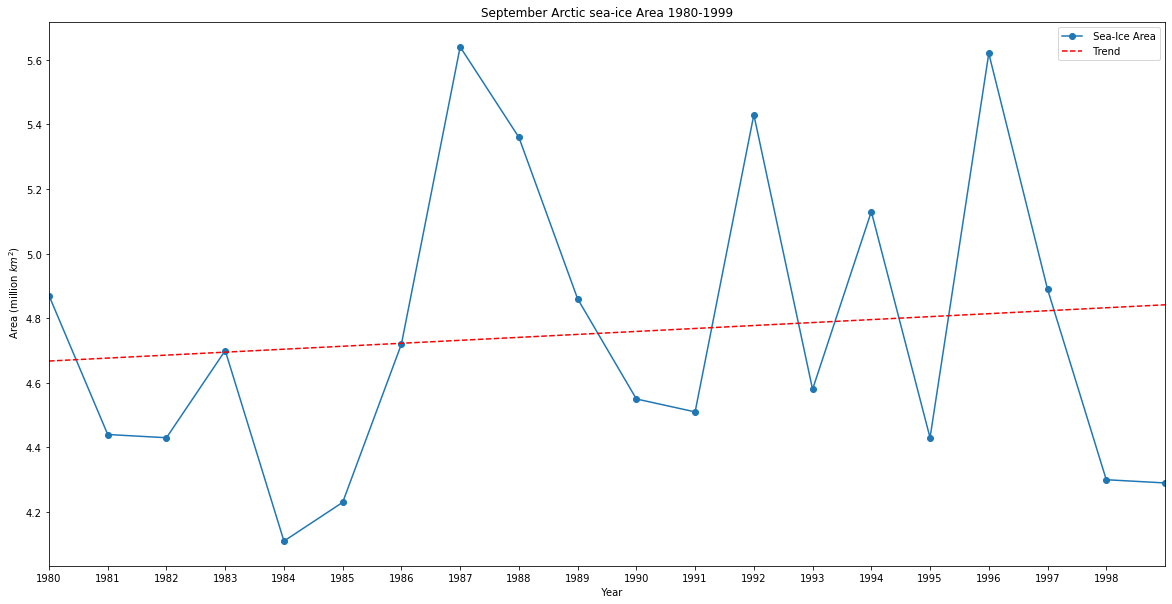

In [11]:
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
#print(tab['Area'][0:21])
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year'][0:20]
yaxis=tab['Area'][0:20]
ax.set_ylabel('  Area (million $km^2$)')
ax.set_title('September Arctic sea-ice Area 1980-1999')
ax.set_xlabel('   Year')
ax.set_xlim(1980,1999)
ax.set_xticks(np.arange(1980, 1999, step=1))
plt.plot(xaxis,yaxis,'o-')
z = np.polyfit(xaxis,yaxis, 1) 
p = np.poly1d(z)
ax.plot(xaxis,p(xaxis),"r--")
#plt.plot(x,y)
plt.legend([" Sea-Ice Area", " Trend"])
fig.savefig('Sept_SeaIceArea_1980-1999.png')
plt.show()

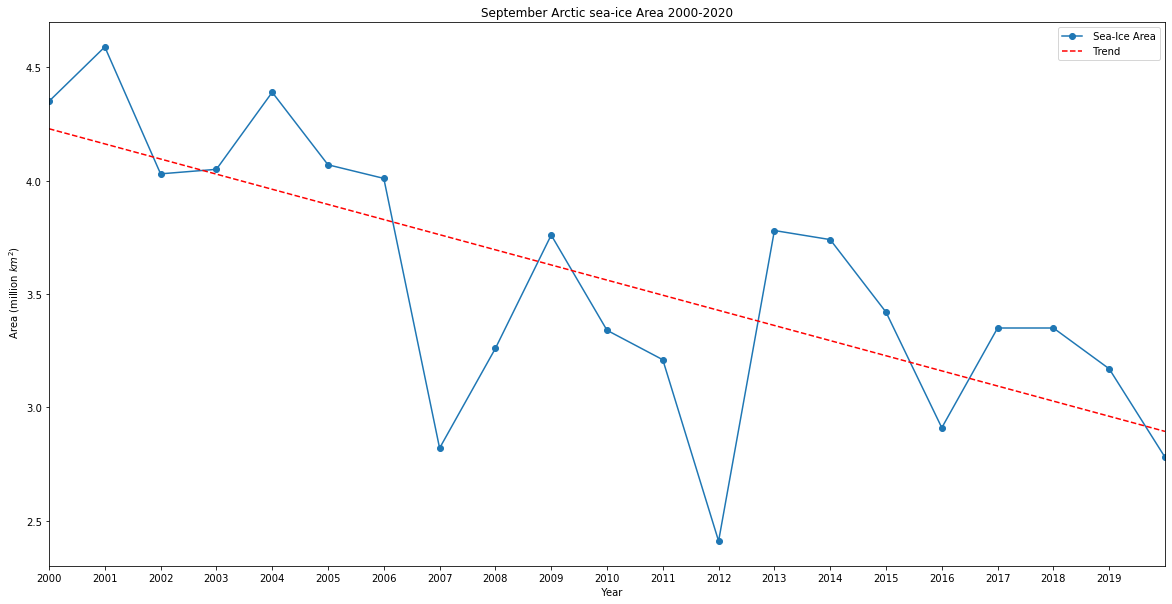

In [12]:
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
#print(tab['Area'][0:21])
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year'][20:41]
yaxis=tab['Area'][20:41]
ax.set_ylabel('  Area (million $km^2$)')
ax.set_title('September Arctic sea-ice Area 2000-2020')
ax.set_xlabel('   Year')
ax.set_xlim(2000,2020)
ax.set_xticks(np.arange(2000, 2020, step=1))
plt.plot(xaxis,yaxis,'o-')
z = np.polyfit(xaxis,yaxis, 1) 
p = np.poly1d(z)
ax.plot(xaxis,p(xaxis),"r--")
#plt.plot(x,y)
plt.legend([" Sea-Ice Area", " Trend"])
fig.savefig('Sept_SeaIceArea_2000-2020.png')
plt.show()

In [46]:
##Avg data by decade split & subtract value from average to get anomaly
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
area_list=tab['Area'][0:20]
year_list=tab['Year'][0:20]
#print(year_list)
avg = sum(area_list)/len(area_list)
anom_list=[]
for i in range(len(area_list)):
    anom = np.around(area_list[i] - avg,decimals=3)
    anom_list.append(anom)
#print(anom_list)
area_tab=Table([year_list,anom_list],names=('Year','Area Anomaly'))
print(area_tab)

Year Area Anomaly
---- ------------
1980        0.116
1981       -0.314
1982       -0.324
1983       -0.054
1984       -0.644
1985       -0.524
1986       -0.034
1987        0.886
1988        0.606
1989        0.106
1990       -0.204
1991       -0.244
1992        0.676
1993       -0.174
1994        0.376
1995       -0.324
1996        0.866
1997        0.136
1998       -0.454
1999       -0.464


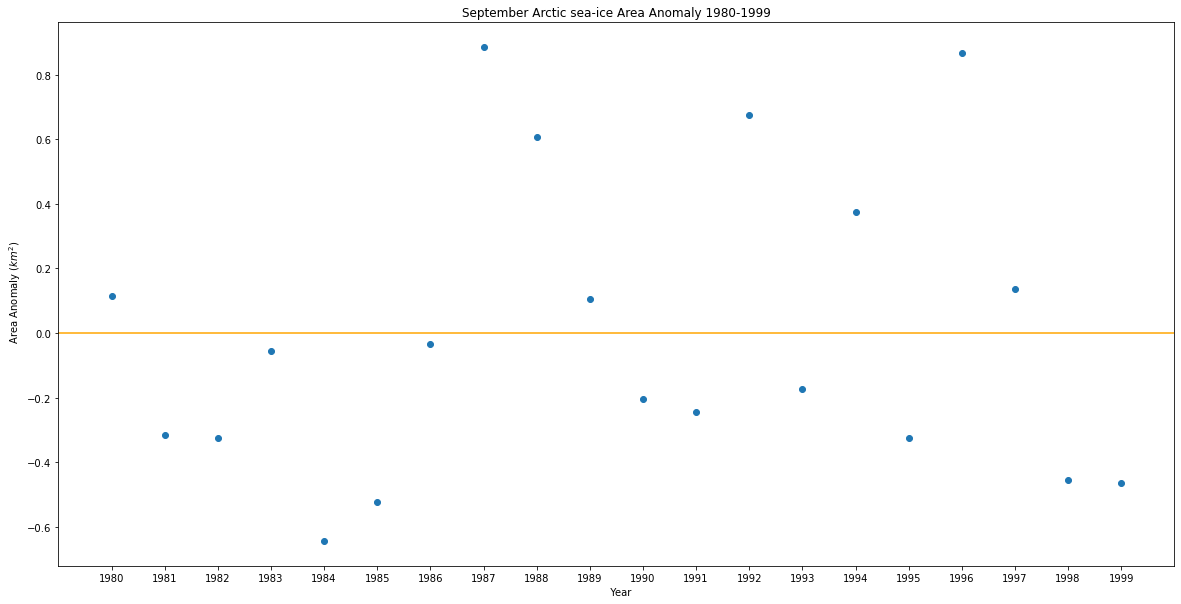

In [47]:
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)


plt.scatter(area_tab['Year'],area_tab['Area Anomaly'])
plt.hlines(0,1979,2000,'orange')
ax.set_ylabel('  Area Anomaly ($km^2$)')
ax.set_title('September Arctic sea-ice Area Anomaly 1980-1999')
ax.set_xlabel('   Year')
ax.set_xlim(1979,2000)
ax.set_xticks(np.arange(1980, 2000, step=1))

In [48]:
##Avg data by decade split & subtract value from average to get anomaly
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
area_list=tab['Area'][20:41]
year_list=tab['Year'][20:41]
#print(year_list)
avg = sum(area_list)/len(area_list)
anom_list=[]
for i in range(len(area_list)):
    anom = np.around(area_list[i] - avg,decimals=3)
    anom_list.append(anom)
#print(anom_list)
area_tab=Table([year_list,anom_list],names=('Year','Area Anomaly'))
print(area_tab)

Year Area Anomaly
---- ------------
2000        0.789
2001        1.029
2002        0.469
2003        0.489
2004        0.829
2005        0.509
2006        0.449
2007       -0.741
2008       -0.301
2009        0.199
2010       -0.221
2011       -0.351
2012       -1.151
2013        0.219
2014        0.179
2015       -0.141
2016       -0.651
2017       -0.211
2018       -0.211
2019       -0.391
2020       -0.781


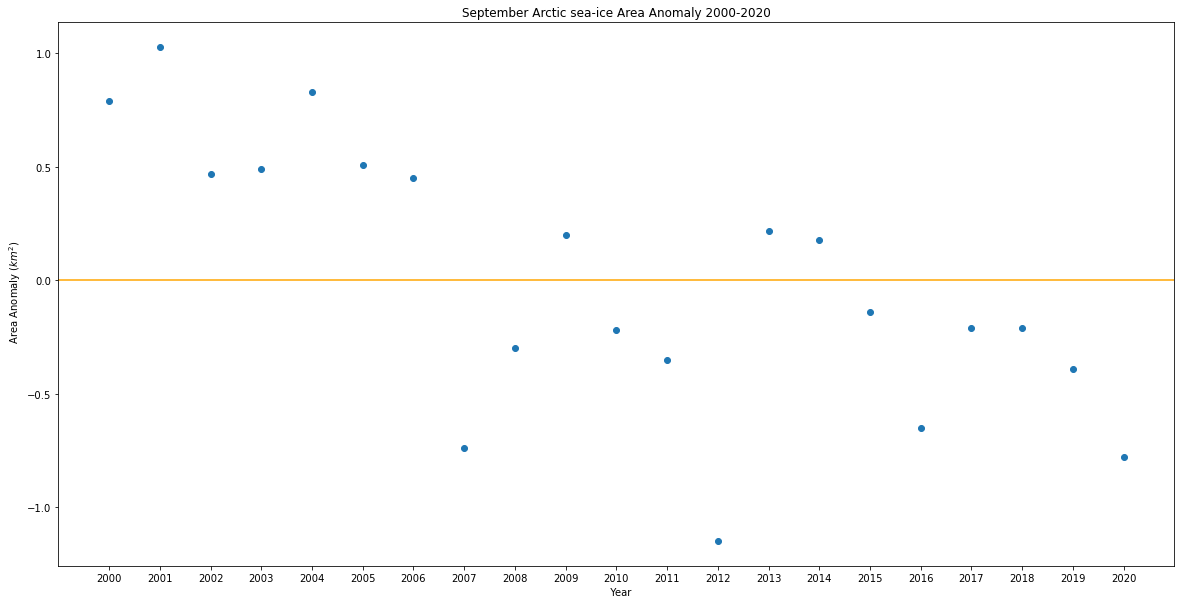

In [51]:
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)


plt.scatter(area_tab['Year'],area_tab['Area Anomaly'])
plt.hlines(0,1999,2021,'orange')
ax.set_ylabel('  Area Anomaly ($km^2$)')
ax.set_title('September Arctic sea-ice Area Anomaly 2000-2020')
ax.set_xlabel('   Year')
ax.set_xlim(1999,2021)
ax.set_xticks(np.arange(2000, 2021, step=1))

# standard dev

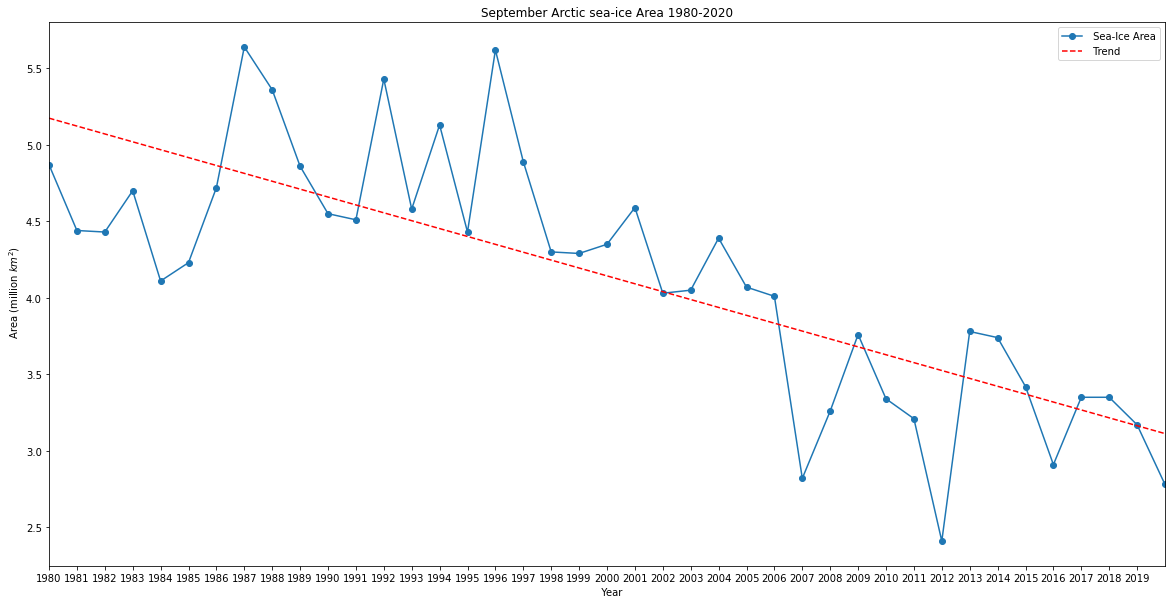

In [21]:
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year']
yaxis=tab['Area']
ax.set_ylabel('  Area (million $km^2$)')
ax.set_title('September Arctic sea-ice Area 1980-2020')
ax.set_xlabel('   Year')
ax.set_xlim(1980,2020)
ax.set_xticks(np.arange(1980, 2020, step=1))
plt.plot(xaxis,yaxis,'o-')
z = np.polyfit(xaxis,yaxis, 1) 
p = np.poly1d(z)
ax.plot(xaxis,p(xaxis),"r--")
#plt.plot(x,y)
plt.legend([" Sea-Ice Area", " Trend"])
fig.savefig('Sept_SeaIceArea_1980-2020.png')
plt.show()

In [4]:
print(tab)

Year Extent Area
---- ------ ----
1980   7.67 4.87
1981   7.14 4.44
1982    7.3 4.43
1983   7.39  4.7
1984   6.81 4.11
1985    6.7 4.23
1986   7.41 4.72
1987   7.28 5.64
1988   7.37 5.36
1989   7.01 4.86
 ...    ...  ...
2010   4.87 3.34
2011   4.56 3.21
2012   3.57 2.41
2013   5.21 3.78
2014   5.22 3.74
2015   4.62 3.42
2016   4.53 2.91
2017   4.82 3.35
2018   4.79 3.35
2019   4.36 3.17
2020   3.92 2.78
Length = 41 rows


In [5]:
std = np.std(tab['Area'])
print(std)
avg=np.mean(tab['Area'])
print(avg)
plusone=avg+std/2
print(plusone)
minusone=avg-std/2
print(minusone)

0.7889468427983293
4.1434146341463425
4.5378880555455074
3.748941212747178


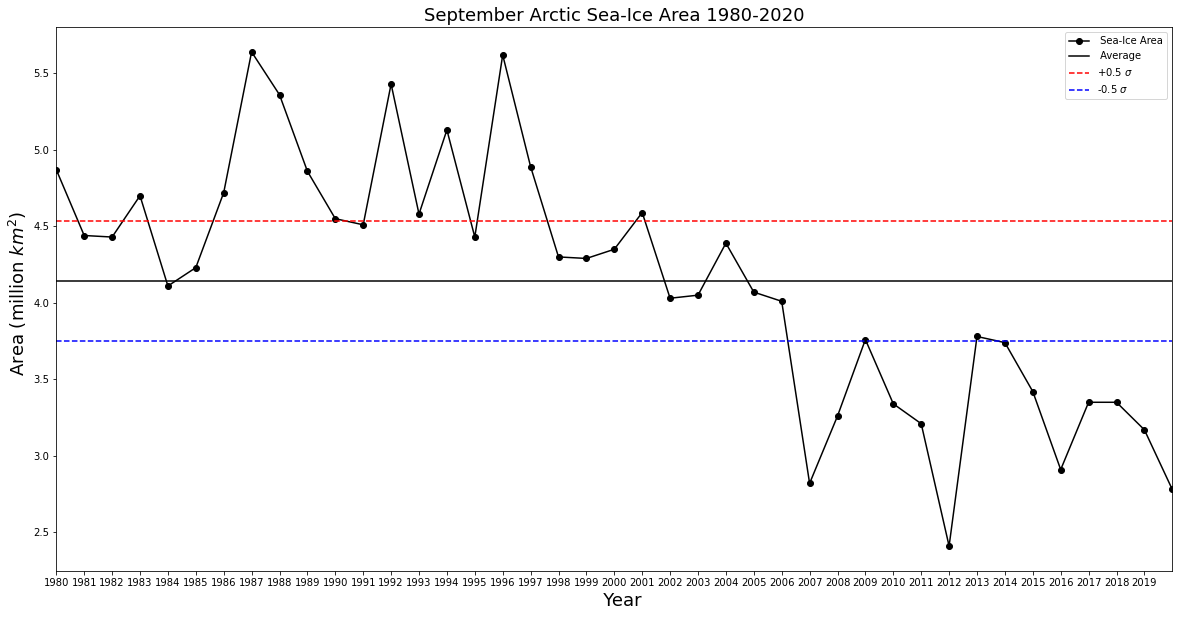

In [7]:
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year']
yaxis=tab['Area']
avg_xaxis=[avg]*len(tab['Area'])
plusone_xaxis=[plusone]*len(tab['Area'])
minusone_xaxis=[minusone]*len(tab['Area'])
ax.set_ylabel('  Area (million $km^2$)',size=18)
ax.set_title('September Arctic Sea-Ice Area 1980-2020',size=18)
ax.set_xlabel('   Year',size=18)
ax.set_xlim(1980,2020)
ax.set_xticks(np.arange(1980, 2020, step=1))
plt.plot(xaxis,yaxis,'ko-')
#z = np.polyfit(xaxis,yaxis, 1) 
#p = np.poly1d(z)
ax.plot(xaxis,avg_xaxis,"k-")
ax.plot(xaxis,plusone_xaxis,"r--")
ax.plot(xaxis,minusone_xaxis,"b--")
#plt.plot(x,y)
plt.legend([" Sea-Ice Area", " Average","+0.5 $\sigma$","-0.5 $\sigma$"])
fig.savefig('Sept_SeaIceArea_std_1980-2020.png')
plt.show()

# Detrended time series #

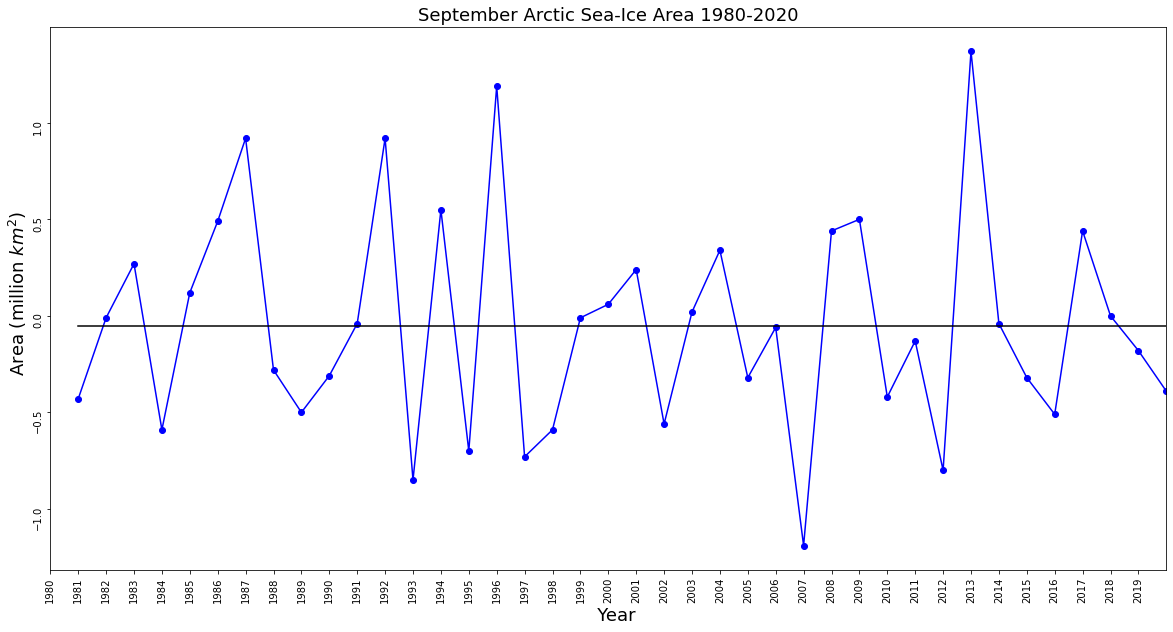

In [255]:
tab = Table.read('Data/sea-ice-extent_1980-2020',format='ascii')
year=tab['Year'][1:41]
area = np.array(tab['Area'])
#print(area)
diff = list()
#avg=[]
for i in range(1, len(area)):
    value = area[i] - area[i-1]
    diff.append(value)
avg_calc =np.average(diff)
avg=[avg_calc]*40
#print(avg)
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
ax.set_ylabel('  Area (million $km^2$)',size=18)
ax.set_title('September Arctic Sea-Ice Area 1980-2020',size=18)
ax.set_xlabel('   Year',size=18)
ax.set_xlim(1980,2020)
ax.set_xticks(np.arange(1980, 2020, step=1))
ax.tick_params(labelrotation=90)
plt.plot(year, diff,'bo-')
plt.plot(year,avg,'k-')


# UK Hadley Centre Data

In [123]:
file = 'Data/Sea-Ice-Concentration_Hadley/HadISST_ice.nc'
ds = nc.Dataset(file,'r')
print(ds['time'])
print(ds['latitude'][0:59]) ## 
print(ds['longitude'][:])
time_var = ds.variables['time']
dtime = nc.num2date(time_var[:],time_var.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
print(dtime)
for i in range(0,len(dtime)):
    year=dtime[i].year
    if year==1950:
        print(i)

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: days since 1870-1-1 0:0:0
    calendar: gregorian
    long_name: Time
    standard_name: time
unlimited dimensions: time
current shape = (1816,)
filling on, default _FillValue of 9.969209968386869e+36 used
[89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 79.5 78.5 77.5 76.5
 75.5 74.5 73.5 72.5 71.5 70.5 69.5 68.5 67.5 66.5 65.5 64.5 63.5 62.5
 61.5 60.5 59.5 58.5 57.5 56.5 55.5 54.5 53.5 52.5 51.5 50.5 49.5 48.5
 47.5 46.5 45.5 44.5 43.5 42.5 41.5 40.5 39.5 38.5 37.5 36.5 35.5 34.5
 33.5 32.5 31.5]
[-179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 -172.5 -171.5 -170.5
 -169.5 -168.5 -167.5 -166.5 -165.5 -164.5 -163.5 -162.5 -161.5 -160.5
 -159.5 -158.5 -157.5 -156.5 -155.5 -154.5 -153.5 -152.5 -151.5 -150.5
 -149.5 -148.5 -147.5 -146.5 -145.5 -144.5 -143.5 -142.5 -141.5 -140.5
 -139.5 -138.5 -137.5 -136.5 -135.5 -134.5 -133.5 -132.5 -131.5 -130.5
 -129.5 -128.5 -127.5 -126.5 -125.5 -124.5 -123.5 -122.5 -121.5 -120.5
 

In [130]:
yearList=[]
for num in range(1950,2021):
    yearList.append(num)
print(yearList)

siaTotal_List=[]
for i in range(960,len(time_var)): ##len(time_var)
    dtime = nc.num2date(time_var[:],time_var.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
    #yearList.append(dtime[i].year)
    if dtime[i].month == 9:
        #latRange = ds['sic'][:,0:59,:]
        sia_list=[]
        for j in range(0,len(ds['latitude'][0:59])):
            for k in range(0,len(ds['longitude'][:])):
                sic = ds['sic'][i,j,k]
                lonDist=np.cos(ds['latitude'][j])*111
                #print(lonDist)
                sia = sic*(111*lonDist)
                sia_list.append(sia)
        siaTotal = np.nansum(sia_list)
        siaTotal_List.append(siaTotal)
#print(sia_list)
        print(np.nansum(sia_list))
print(siaTotal_List)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
3604229.1957533015
3604229.1957533015
3604229.1957533015
3534711.851107837
3759392.2592249936
3604593.332253886
3542356.6505685314
3509962.441041391
3609340.8120626314
3430089.862455525
2922968.918583858
3574146.5981402937
3877824.7382595986
3561694.813382271
3643733.484414727
3861042.163774978
3433665.1278915796
3013327.6643245714
3944564.658292843
3515105.2357677673
3888754.239997644
3999957.0267986604
3776667.367110805
4029393.290469218
3745458.584991288
3172608.0229297793
3752290.0641702237
4531629.352687156
3946340.2032660535
3078166.7988693253
3082261.149949423

In [132]:
sia_tab = Table([yearList,siaTotal_List],names=('Year','Sea Ice Area'))
print(sia_tab)

Year    Sea Ice Area   
---- ------------------
1950 3604229.1957533015
1951 3604229.1957533015
1952 3604229.1957533015
1953  3534711.851107837
1954 3759392.2592249936
1955  3604593.332253886
1956 3542356.6505685314
1957  3509962.441041391
1958 3609340.8120626314
1959  3430089.862455525
 ...                ...
2010 3620468.8484575576
2011 2463082.7126031294
2012 3031457.4151043645
2013 3410554.1764470814
2014 2905337.4541503233
2015  2628314.284303137
2016  2768682.823816348
2017  3163721.501392119
2018 2664881.0719433874
2019  3219703.919103439
2020 3015014.2205230924
Length = 71 rows


In [133]:
ascii.write(sia_tab, 'sea-ice-area_1950-2020_Hadley-Data', names=['Year','Sea Ice Area'], overwrite=True)

In [165]:
tab = Table.read('sea-ice-area_1950-2020_Hadley-Data',format='ascii')
print(tab)
tab.show_in_notebook()

Year    Sea Ice Area   
---- ------------------
1950 3604229.1957533015
1951 3604229.1957533015
1952 3604229.1957533015
1953  3534711.851107837
1954 3759392.2592249936
1955  3604593.332253886
1956 3542356.6505685314
1957  3509962.441041391
1958 3609340.8120626314
1959  3430089.862455525
 ...                ...
2010 3620468.8484575576
2011 2463082.7126031294
2012 3031457.4151043645
2013 3410554.1764470814
2014 2905337.4541503233
2015  2628314.284303137
2016  2768682.823816348
2017  3163721.501392119
2018 2664881.0719433874
2019  3219703.919103439
2020 3015014.2205230924
Length = 71 rows


idx,Year,Sea Ice Area
0,1950,3604229.1957533015
1,1951,3604229.1957533015
2,1952,3604229.1957533015
3,1953,3534711.851107837
4,1954,3759392.2592249936
5,1955,3604593.332253886
6,1956,3542356.6505685314
7,1957,3509962.441041391
8,1958,3609340.8120626314
9,1959,3430089.862455525


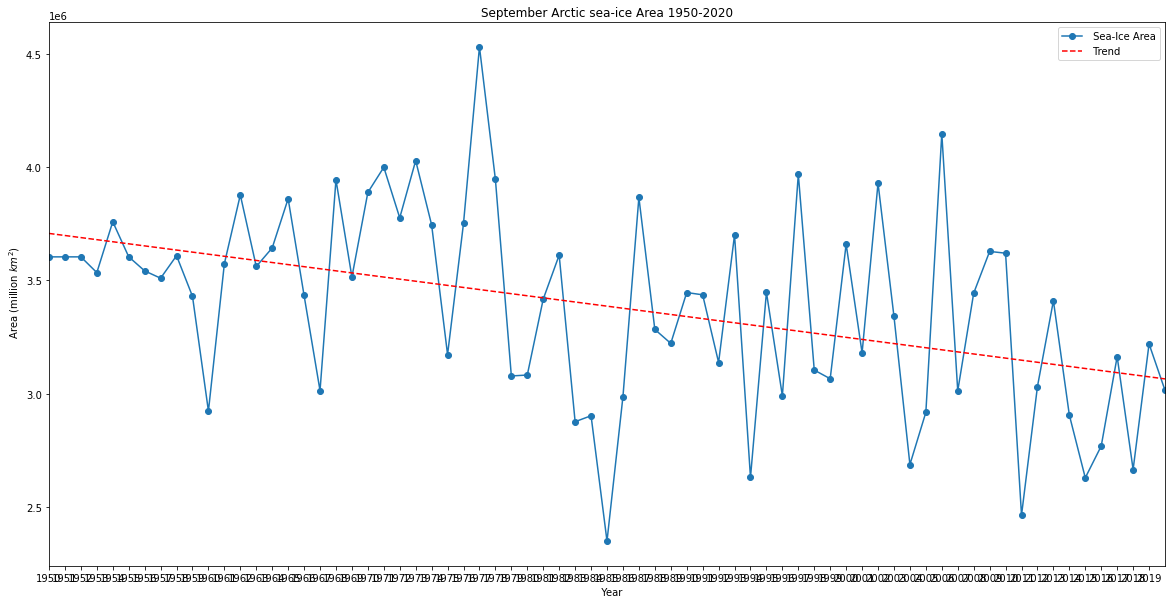

In [136]:
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year']
yaxis=tab['Sea Ice Area']
ax.set_ylabel('  Area (million $km^2$)')
ax.set_title('September Arctic sea-ice Area 1950-2020')
ax.set_xlabel('   Year')
ax.set_xlim(1950,2020)
ax.set_xticks(np.arange(1950, 2020, step=1))
plt.plot(xaxis,yaxis,'o-')
z = np.polyfit(xaxis,yaxis, 1) 
p = np.poly1d(z)
ax.plot(xaxis,p(xaxis),"r--")
#plt.plot(x,y)
plt.legend([" Sea-Ice Area", " Trend"])
fig.savefig('Sept_SeaIceExtent_1980-2020.png')
plt.show()

71
[3604229.1957533  3604229.1957533  3604229.1957533  3534711.85110784
 3759392.25922499 3604593.33225389 3542356.65056853 3509962.44104139
 3609340.81206263 3430089.86245552 2922968.91858386 3574146.59814029
 3877824.7382596  3561694.81338227 3643733.48441473 3861042.16377498
 3433665.12789158 3013327.66432457 3944564.65829284 3515105.23576777
 3888754.23999764 3999957.02679866 3776667.36711081 4029393.29046922
 3745458.58499129 3172608.02292978 3752290.06417022 4531629.35268716
 3946340.20326605 3078166.79886933 3082261.14994942 3417650.84375969
 3611967.88978249 2876081.09562816 2902499.33137337 2348759.77451867
 2986580.59092915 3866710.18339867 3283757.95025125 3222044.11727187
 3446647.93539646 3436554.76326478 3137580.13946521 3701330.19162635
 2629687.82388018 3447705.98104962 2990152.6589889  3968833.20320073
 3104138.30973978 3065933.04969922 3660429.23667445 3180147.27910445
 3929824.73307859 3340936.86273103 2686916.86892756 2917447.63258934
 4148380.50637022 3012260.11806

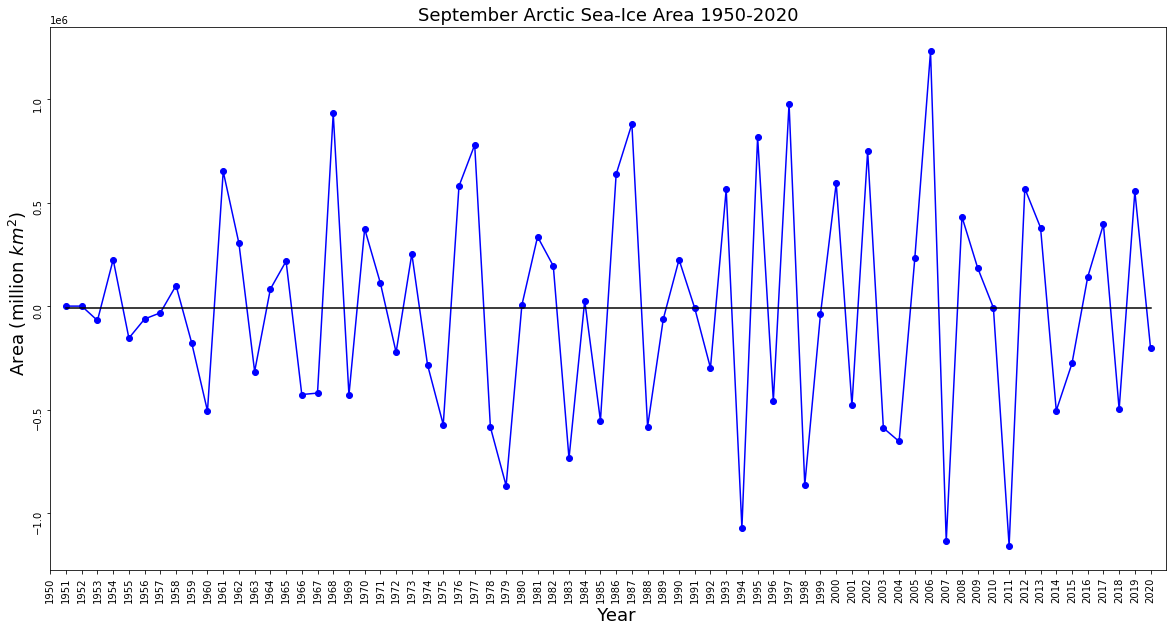

In [164]:
tab = Table.read('sea-ice-area_1950-2020_Hadley-Data',format='ascii')
year=tab['Year'][1:71]
print(len(tab['Sea Ice Area']))
area = np.array(tab['Sea Ice Area'])
print(area)
diff = list()
#avg=[]
for i in range(1, len(area)):
    value = area[i] - area[i-1]
    diff.append(value)
avg_calc =np.average(diff)
avg=[avg_calc]*70
#print(avg)
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
ax.set_ylabel('  Area (million $km^2$)',size=18)
ax.set_title('September Arctic Sea-Ice Area 1950-2020',size=18)
ax.set_xlabel('   Year',size=18)
ax.set_xlim(1950,2021)
ax.set_xticks(np.arange(1950, 2021, step=1))
ax.tick_params(labelrotation=90)
plt.plot(year, diff,'bo-')
plt.plot(year,avg,'k-')

In [178]:
test = {"type": "Polygon", "coordinates": [[
    [-180,31], [180,31], [-180,90], [180,90]
]]}

lon,lat = zip(*test['coordinates'][0])
from pyproj import Proj
pa = Proj("+proj=aea +lat_1=31 +lat_2=90 +lat_0=59.5 +lon_0=0")

In [183]:
x,y = pa(lon,lat)
cop={"type": "Polygon","coordinates": [zip(x,y)]}
from shapely.geometry import shape
shape(cop).area/1000000 

26030245.47229174

In [246]:
tab = Table.read('Data/Sea-Ice-Area_NSIDC/sibt_areas_v2.csv',format='ascii',data_start=2,header_start=1)
tab.show_in_notebook()
yearList=[]
areaList=[]
for i in range(1,len(tab['Northern_Hemisphere'])): #len(tab['Northern_Hemisphere'])
    year=str(tab['YYYYDDD'][i])
    #print(year)
    #yearList.append(year[0:4])
   # print(type(year[4:7]))
    if year[4:7] == '258' or year[4:7] == '259':
        yearList.append(year[0:4])
        area=tab['Northern_Hemisphere'][i]
        areaList.append(area)
#print(yearList)
#print(areaList)
area_tab = Table([yearList,areaList],names=("Year","Area"))
#print(area_tab)
ascii.write(area_tab, 'sea-ice-area_1850-2017_NSIDC-Data', names=['Year','Area'], overwrite=True)

In [247]:
tab = Table.read('sea-ice-area_1850-2017_NSIDC-Data',format='ascii')
tab.show_in_notebook()

idx,Year,Area
0,1850,6929725.27
1,1851,7083403.37
2,1852,7364059.84
3,1853,6954620.14
4,1854,5947625.4
5,1855,7265635.01
6,1856,7080237.16
7,1857,6611869.36
8,1858,6644061.81
9,1859,6931123.93


168
[7204162.97 7204162.97 7204162.97 7064227.61 7024047.27 6933562.38
 7204162.97 6927241.53 6594954.95 6126153.4  5779092.24 7094928.74
 6063934.54 6700801.21 6920912.81 6506910.82 6306421.26 6776488.49
 5997202.79 6456767.36 6435415.28 6156674.75 6807647.7  6969148.01
 6507529.04 6344683.45 6284046.4  5961473.18 6503942.73 6934497.37
 6749357.86 7155325.73 7171335.03 6934212.89 6303384.88 6387246.58
 6248760.37 7610025.65 7849473.75 7380580.66 7461881.65 7241557.16
 7466901.71 6587046.38 7571312.66 7412162.97 6543595.96 6875720.9
 6962606.69 6743124.57 7042683.44 6642349.57 6475143.8  7064243.1
 6552896.95 7205060.13 6724032.4  6774380.58 6944976.83 6359169.83
 6403769.67 6975806.05 6866721.05 7012268.63 6565983.59 5873657.59
 5848250.99 6996108.4  5826210.46 6696037.06 5753159.02 7217036.85
 6329287.94 5795481.71 5456871.44 5767044.74 5960876.08 5283450.63
 5608762.6  5661449.59 5131719.34 5240300.98 3723341.49 4177891.83
 4840329.92 4334516.54 4192894.82 2860459.3  4645644.22 4703

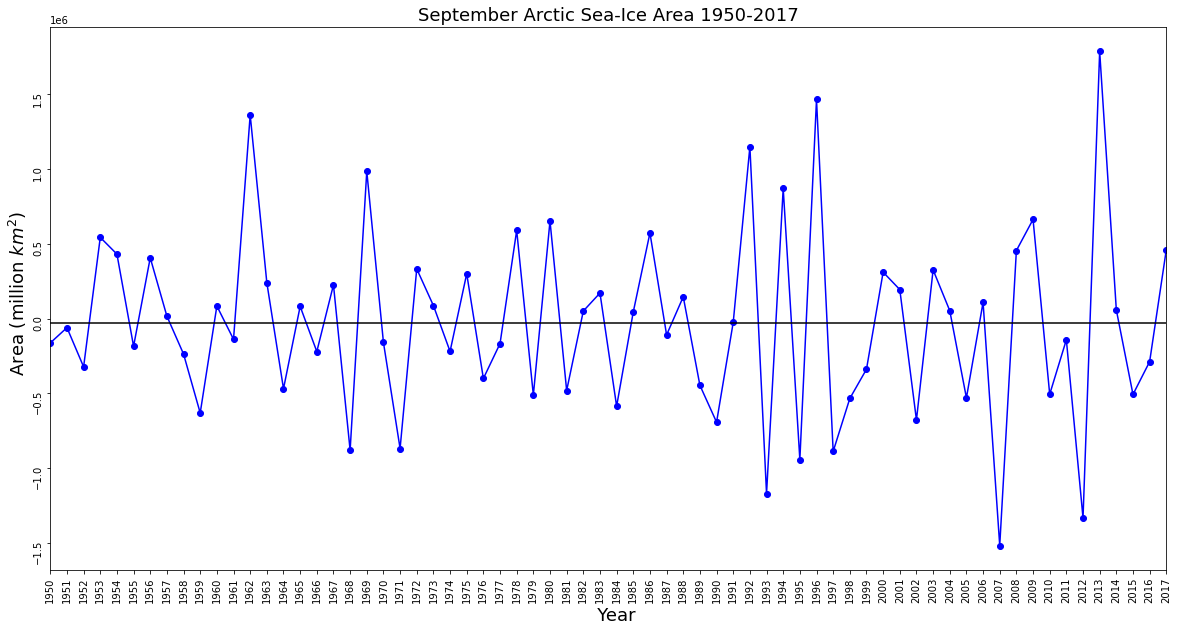

In [251]:
tab = Table.read('sea-ice-area_1850-2017_NSIDC-Data',format='ascii')
year=tab['Year'][76:168]
print(len(tab['Year']))
area = np.array(tab['Area'][75:168])
print(area)
diff = list()
#avg=[]
for i in range(1, len(area)):
    value = area[i] - area[i-1]
    diff.append(value)
avg_calc =np.average(diff)
avg=[avg_calc]*92
#print(avg)
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
ax.set_ylabel('  Area (million $km^2$)',size=18)
ax.set_title('September Arctic Sea-Ice Area 1950-2017',size=18)
ax.set_xlabel('   Year',size=18)
ax.set_xlim(1950,2017)
ax.set_xticks(np.arange(1950, 2018, step=1))
ax.tick_params(labelrotation=90)
plt.plot(year, diff,'bo-')
plt.plot(year,avg,'k-')

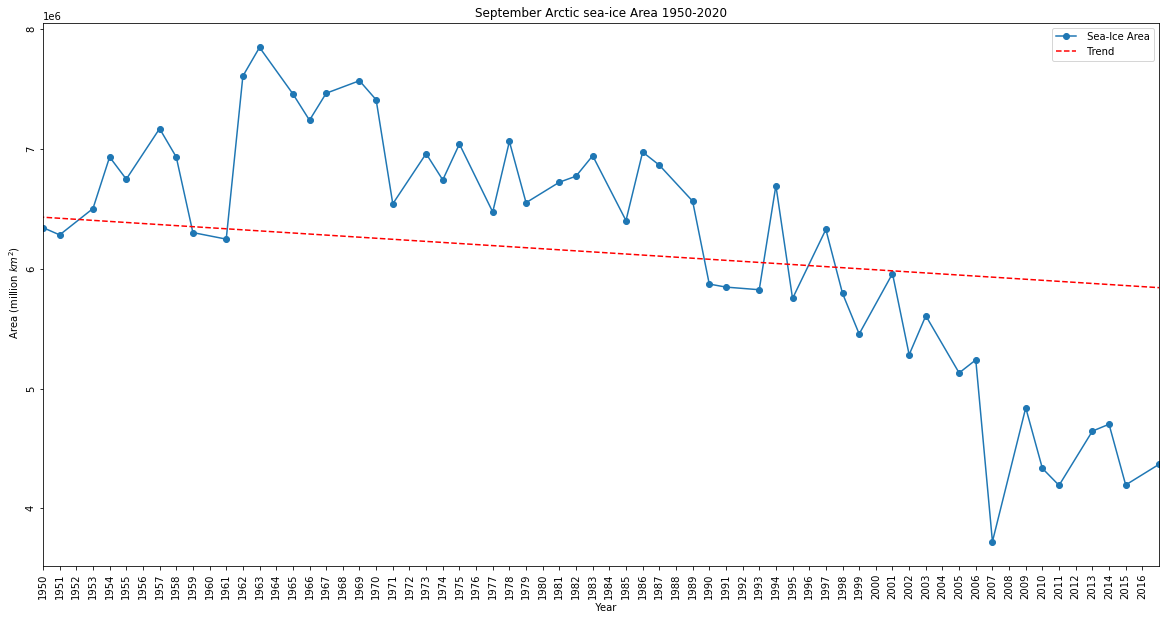

In [239]:
fig=plt.figure(figsize=(20,10))
ax= fig.add_subplot(111)
xaxis=tab['Year']
yaxis=tab['Area']
ax.set_ylabel('  Area (million $km^2$)')
ax.set_title('September Arctic sea-ice Area 1950-2020')
ax.set_xlabel('   Year')
ax.set_xlim(1950,2017)
ax.set_xticks(np.arange(1950, 2017, step=1))
plt.plot(xaxis,yaxis,'o-')
z = np.polyfit(xaxis,yaxis, 1) 
p = np.poly1d(z)
ax.plot(xaxis,p(xaxis),"r--")
ax.tick_params(labelrotation=90)
#plt.plot(x,y)
plt.legend([" Sea-Ice Area", " Trend"])
fig.savefig('Sept_SeaIceExtent_1980-2020.png')
plt.show()